# Lab 10
## K-Nearest Neighbors Matching (KNN)
4/4/2018

### Announcements:
* The structure of labs/lab readings for the second portion of the class will be similar to the first with some differences.  We don't have pre-written lab modules for this material.  Instead, I'll be writing up a document for each lab in similar format that will be a bit shorter and more tightly tied to the exact content covered in lab.  This will be uploaded to bcourses before class (see Module 9 for today's lab). I won't expect that you've worked through them in advance, as I'll work through all or most of the coding exercises during class time.  You can think of the lab notebook as an outline of what is covered in the module. 
* I'd highly suggest doing the assigned lecture readings from Introduction to Statistical Learning for this portion of the course.  A free PDF of the book can be be found at: http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf
* There will be one homework assignment for this part of the class, which will consist of 3 problems total.  The problems will be written into the lab modules (on bcourses), as before, and there will be one problem corresponding to lab content for this week and the following two.  Due date is April 25th, usual submission rules apply.
* Midterm grading is in progress and is expected to be done by the end of this week.  A reminder that you must submit a written (word processed) regrade request within 72 hours of grades being released if you wish to have your exam re-graded (see syllabus for further detail)
* Office hours for the remainder of the semester will be **1pm-3pm Tuesdays in room N455**.
* The final is May 9, 9:30-12:30pm.  Please let us know by the end of the week if you are not able to take the final in person at that time for an excusable reason (e.g. binding travel, medical procedure).

### Plan for Today's Lab
1. Intro to Statistical Learning and the Classification Setting (15 minutes)
2. Conceptual Explanation of KNN (15 minutes)
3. Example using Auto Insurance Sales (20 minutes)

## 1- Intro

### Infererence vs Prediction
The main focus of this part of the class will be prediction, rather than inference.  What is a scenario where we'd prefer to use predictive tools instead of the techniques we learned in the first part of the class?

### Training Data vs Test Data
* Goal is to make predictions for outcomes that we do not yet observe using previously observed data.  
* Must split previously observed data into training and test datasets.  
* Use the training data to generate our model, and test its fit on the test data.  
* Minimizing the error rate for the test dataset optimizes performance of model for real world predictions
* A lower error rate on the training dataset is not necessarily good as this can lead to overfitting, worse performance on test data
- **Goal: minimize error rate on test data sets**

### Classification Setting
* Important prediction scenario: how observations fall into different categories or classes
* Could be several categories, or binary groups (such as success vs failure).  Can anyone think of a real world example where we'd want to predict classification?
* Testing error rate will just be average rate of failure to predict correct category
* Consider case of two categories, success and failure, where the outcome is Y and we have 1 predictor variable X.  Minimize test error rate when we assign each observation to Success when the conditional probability of success conditional on the predictor variable is greater than 0.5:
$ Pr⁡(Y=Success│X=x_0 )>0.5→\hat Y=Success $
* Called the Bayes Classifier-- logic extends for more predictor variables, outcome categories
* But we don't know underlying probabilities!  We'll use KNN to estimate them

## 2-Conceptual Explanation of KNN
* Works by taking an observation from the test dataset and identifying a number of observations K in the training dataset whose predictor variable values are closest to its own
* Estimates the conditional probability of Success by using the fraction of these surrounding observations whose actual outcome is Success
* Can pick any number of observations K.  
* See figures below with K=3, two predictor variables
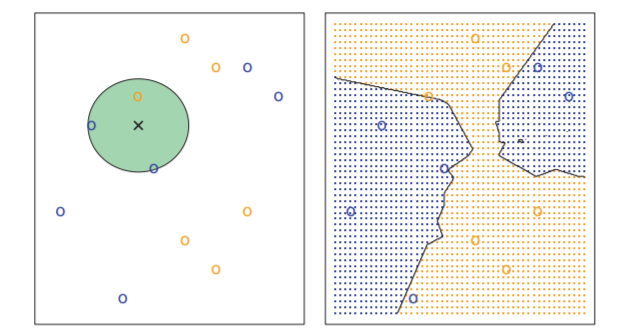


* Smaller value of K => more flexible our model => lower our training error rate 
* K=1, training error rate will be 0 
* See figures below to see how choice of K affects performance in training data set
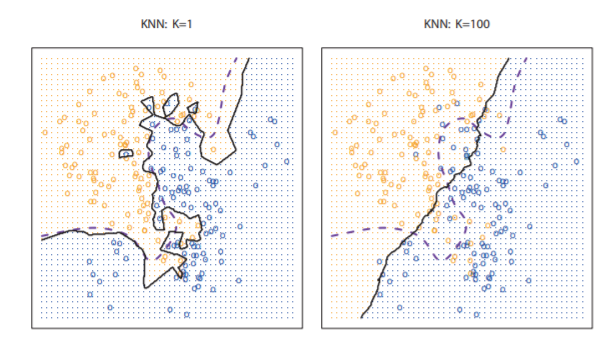
* Same tradeoffs between variance and bias that we discussed in lecture apply 
* Lower training error rate does not necessarily mean that our testing error rate will be lower, which is what we ultimately care about
* Graph below shows the testing error rate is quite high when n=1, and is actually minimized roughly around K=10
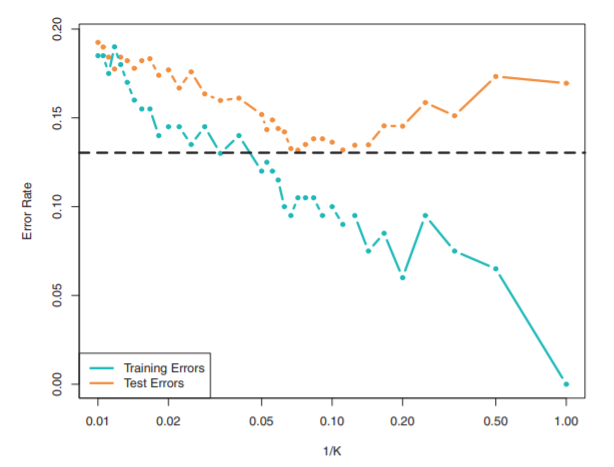

## 3- Example using Auto Insurance Sales
We will practice an example of KNN reproduced from section 4.6.6 of ISL, which uses the Caravan auto insurance dataset.  This data set includes 85 predictors that measure demographic characteristics for 5,822 individuals. The response variable is Purchase, which indicates whether or not a given individual purchases an auto insurance policy. 

First we will read the dataset AutoInsurance.csv into R. We will then use the dim and the summary functions to understand the structure and summary of the response variable.


In [1]:
# Set working directory to the location of your data files
# setwd("/home/jovyan/mba217-2/Data")
require(class)
# Read the data 
Insurance_Data <- read.csv("../Data/AutoInsurance.csv", header = TRUE)

# Examine the data 
dim(Insurance_Data)
# you can attach a dataset so that you don't have to reference it every time
summary(Insurance_Data$Purchase)
# Purchase Rate
348/(5474 + 348) 


Loading required package: class


[1] 5822   86

No  Yes 
5474  348

[1] 0.05977327

Because The KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, than variables that are on a small scale. 

A good way to handle this problem is to standardize the data so that all standardize variables are given a mean of zero and a standard deviation of one. Then all variables will be on a comparable scale. The scale()  function does just this. In standardizing the data, we exclude column 86, because that is the outcome Purchase variable.


In [2]:
attach(Insurance_Data)
# str(Insurance_Data)

In [3]:
standardized.X=scale(Insurance_Data[,-86])
var(Insurance_Data[,1])
var(standardized.X[,1])
summary(standardized.X[,1])

[1] 165.0378

[1] 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.8101 -1.1095  0.4473  0.0000  0.8365  1.3036 

We now split the observations into a test set, containing the first 1,000 observations, and a training set, containing the remaining observations. The vector test is numeric, with values from 1 through 1000. 

In [4]:
test=1:1000
train.X=standardized.X[-test ,]
test.X=standardized.X[test ,]
train.Y=Purchase[-test]
test.Y=Purchase[test]

We fit a KNN model on the training data using K  = 1, and evaluate its performance on the test data. It is a good practice to set seed for replicable results while training models.

In [5]:
#Set Seed
set.seed(1)
#Generate KNN model with K=1
knn.pred=knn(train.X,test.X,train.Y,k=1)
#Overall Error rate for K=1
mean(test.Y!=knn.pred) # test error rate in the last graph in section #2
#Error tate for always predict No
mean(test.Y!="No")


[1] 0.118

[1] 0.059

In [8]:
train <- rbind(iris3[1:25,,1], iris3[1:25,,2], iris3[1:25,,3])
test <- rbind(iris3[26:50,,1], iris3[26:50,,2], iris3[26:50,,3])
cl <- factor(c(rep("s",25), rep("c",25), rep("v",25)))
knn(train, test, cl, k = 3, prob=TRUE)
attributes(.Last.value)

[1] s s s s s s s s s s s s s s s s s s s s s s s s s c c v c c c c c v c c c c
[39] c c c c c c c c c c c c v c c v v v v v v v v v v c v v v v v v v v v v v
attr(,"prob")
 [1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [8] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[22] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667
[29] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667 1.0000000
[36] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[43] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[50] 1.0000000 1.0000000 0.6666667 0.7500000 1.0000000 1.0000000 1.0000000
[57] 1.0000000 1.0000000 0.5000000 1.0000000 1.0000000 1.0000000 1.0000000
[64] 0.6666667 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[71] 1.0000000 0.6666667 1.0000000 1.0000000 0.6666667
Levels: c s v

$levels
[1] "c" "s" "v"

$class
[1] "factor"

$prob
 [1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [8] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[22] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667
[29] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.6666667 1.0000000
[36] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[43] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[50] 1.0000000 1.0000000 0.6666667 0.7500000 1.0000000 1.0000000 1.0000000
[57] 1.0000000 1.0000000 0.5000000 1.0000000 1.0000000 1.0000000 1.0000000
[64] 0.6666667 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[71] 1.0000000 0.6666667 1.0000000 1.0000000 0.6666667

The KNN error rate on the 1,000 test observations is just under 12%. At first glance, this may appear to be fairly good. However, since only 6% of customers purchased insurance, we could get the error rate down to 6% by always predicting No regardless of the values of the predictors!

Suppose that there is some cost to trying to sell insurance to a given individual. A company would like to try to sell insurance only to customers who are likely to buy it. So **the overall error rate is not of interest. Instead, the fraction of individuals that are correctly predicted to buy insurance is of interest.**

Success Rate can be calculated from the confusion matrix (crosstab of predicted vs actual values) as 9/(68+9). It turns out that KNN with K = 1 does far better than random guessing among the customers that are predicted to buy insurance. Among 77 such customers, 9, or 11.7%, actually do purchase insurance. This is double the rate that one would obtain from random guessing (6%). 

Suppose that we know the margin of each insurance policy sold is \$1800 over 3 years, and cost of sale is \$180.  We can compute total profits if we had followed the marketing strategy suggested by KNN with K=1 by adding up total revenue from insurance policies sold and subtracting total cost of sales in the test dataset.  In the example where K=1, this works out to \$2340, which is greater than \$0 from selling no policies.


In [12]:
# Confusion Matrix: Rate of Predicted vs Actual Test # Values
table(knn.pred,test.Y)
#Success Rate
9/(68+9)
#Profits
9*(1800)-77*(180)

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

[1] 0.1168831

[1] 2340

In [22]:
names(Insurance_Data)

[1] "MOSTYPE"  "MAANTHUI" "MGEMOMV"  "MGEMLEEF" "MOSHOOFD" "MGODRK"  
 [7] "MGODPR"   "MGODOV"   "MGODGE"   "MRELGE"   "MRELSA"   "MRELOV"  
[13] "MFALLEEN" "MFGEKIND" "MFWEKIND" "MOPLHOOG" "MOPLMIDD" "MOPLLAAG"
[19] "MBERHOOG" "MBERZELF" "MBERBOER" "MBERMIDD" "MBERARBG" "MBERARBO"
[25] "MSKA"     "MSKB1"    "MSKB2"    "MSKC"     "MSKD"     "MHHUUR"  
[31] "MHKOOP"   "MAUT1"    "MAUT2"    "MAUT0"    "MZFONDS"  "MZPART"  
[37] "MINKM30"  "MINK3045" "MINK4575" "MINK7512" "MINK123M" "MINKGEM" 
[43] "MKOOPKLA" "PWAPART"  "PWABEDR"  "PWALAND"  "PPERSAUT" "PBESAUT" 
[49] "PMOTSCO"  "PVRAAUT"  "PAANHANG" "PTRACTOR" "PWERKT"   "PBROM"   
[55] "PLEVEN"   "PPERSONG" "PGEZONG"  "PWAOREG"  "PBRAND"   "PZEILPL" 
[61] "PPLEZIER" "PFIETS"   "PINBOED"  "PBYSTAND" "AWAPART"  "AWABEDR" 
[67] "AWALAND"  "APERSAUT" "ABESAUT"  "AMOTSCO"  "AVRAAUT"  "AAANHANG"
[73] "ATRACTOR" "AWERKT"   "ABROM"    "ALEVEN"   "APERSONG" "AGEZONG" 
[79] "AWAOREG"  "ABRAND"   "AZEILPL"  "APLEZIER" "AFIETS"   "AINBOED" 
[85] "ABYSTAND" "Purchase"

In [23]:
glm.fit=glm(Purchase ~ MOSTYPE + MAANTHUI + MGEMOMV, data=Insurance_Data, family=binomial , subset =-test)

In [24]:
# logistic regression（book 4.6.2)
# glm.fit=glm(Purchase ~ .,data=Insurance_Data, family=binomial , subset =-test)
glm.fit=glm(Purchase ~ MOSTYPE + MAANTHUI + MGEMOMV, data=Insurance_Data, family=binomial , subset =-test)
glm.probs=predict(glm.fit,Insurance_Data[test,], type="response")
# Predictions with different probability cut-offs
glm.pred=rep("No",1000)
glm.pred[glm.probs>.5]="Yes"
table(glm.pred,test.Y)

glm.pred=rep("No",1000)
glm.pred[glm.probs>.25]="Yes"
table(glm.pred,test.Y)

        test.Y
glm.pred  No Yes
      No 941  59

        test.Y
glm.pred  No Yes
      No 941  59

In [14]:
59 / (941 + 59)

[1] 0.059